# Feature Matrix Python

In [2]:
import os
import pandas as pd
import numpy
import geopandas as gpd

In [3]:
os.chdir('/Users/calvinwhealton/Documents/GitHub/tdi_capstone/data/processed')

In [4]:
zip_mega = gpd.read_file('zips_with_elev.shp')

In [5]:
zip_mega.head()

,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,elev,geometry
0,43451,43451,B5,G6350,S,63484186,157689,+41.3183010,-083.6174935,206.38,"POLYGON ((-83.70873 41.32733, -83.70815 41.327..."
1,43452,43452,B5,G6350,S,121522304,13721730,+41.5157923,-082.9809454,174.5,"POLYGON ((-83.08698 41.53780, -83.08256 41.537..."
2,43456,43456,B5,G6350,S,9320975,1003775,+41.6318300,-082.8393923,186.46,"MULTIPOLYGON (((-82.83558 41.71082, -82.83515 ..."
3,43457,43457,B5,G6350,S,48004681,0,+41.2673301,-083.4274872,217.28,"POLYGON ((-83.49650 41.25371, -83.48382 41.253..."
4,43458,43458,B5,G6350,S,2573816,39915,+41.5304461,-083.2133648,184.67,"POLYGON ((-83.22229 41.53102, -83.22228 41.532..."


In [15]:
zip_mega['GEOID102'] = zip_mega['GEOID10'].values.astype(int)

In [6]:
zip_med_inc = pd.read_csv('zips_med_inc.csv')

In [7]:
zip_med_inc.head()

,Unnamed: 0,zip,med_hh_inc
0,5421,1001.0,67219.000000
1,5422,1002.0,54101.576042
2,5423,1003.0,51878.000000
3,5424,1005.0,68139.000000
4,5425,1007.0,93300.000000


In [10]:
zip_med_inc['GEOID102'] = zip_med_inc['zip'].values.astype(int)

In [17]:
zip_mega2 = pd.DataFrame(zip_mega)
zip_mega3 = pd.merge(zip_mega,zip_med_inc,left_on='GEOID102',right_on='GEOID102')

In [31]:
zip_med_inc.loc[zip_med_inc['zip']==43451]

,Unnamed: 0,zip,med_hh_inc,GEOID102
12776,19238,43451.0,70720.33,43451


In [18]:
zip_mega3.head()

,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,elev,geometry,GEOID102,Unnamed: 0,zip,med_hh_inc
0,43451,43451,B5,G6350,S,63484186,157689,+41.3183010,-083.6174935,206.38,"POLYGON ((-83.70873 41.32733, -83.70815 41.327...",43451,19238,43451.0,70720.330000
1,43452,43452,B5,G6350,S,121522304,13721730,+41.5157923,-082.9809454,174.5,"POLYGON ((-83.08698 41.53780, -83.08256 41.537...",43452,19239,43452.0,52380.147215
2,43456,43456,B5,G6350,S,9320975,1003775,+41.6318300,-082.8393923,186.46,"MULTIPOLYGON (((-82.83558 41.71082, -82.83515 ...",43456,19240,43456.0,66190.000000
3,43457,43457,B5,G6350,S,48004681,0,+41.2673301,-083.4274872,217.28,"POLYGON ((-83.49650 41.25371, -83.48382 41.253...",43457,19241,43457.0,59406.921500
4,43458,43458,B5,G6350,S,2573816,39915,+41.5304461,-083.2133648,184.67,"POLYGON ((-83.22229 41.53102, -83.22228 41.532...",43458,19242,43458.0,75735.000000


In [20]:
zip_mega3.drop(['CLASSFP10','MTFCC10','FUNCSTAT10'],axis=1,inplace=True)

In [21]:
zip_mega3['pct_water'] = zip_mega3['AWATER10']/zip_mega3['ALAND10']

In [22]:
os.chdir('/Users/calvinwhealton/Documents/GitHub/tdi_capstone/data')
pop_by_zip = pd.read_csv('population_by_zip_2000.csv')

In [35]:
pop_by_zip2 = pop_by_zip.groupby(['zipcode']).sum()

In [36]:
pop_by_zip2.head()

,minimum_age,maximum_age,population
zipcode,,,
00601,1910.0,1866.0,57429
00602,1910.0,1866.0,126126
00603,1910.0,1866.0,166590
00604,1910.0,1866.0,11769
00606,1910.0,1866.0,19347


In [37]:
zip_mega4 = pd.merge(zip_mega3,pop_by_zip2,left_on=zip_mega3['GEOID102'].astype(str),right_on='zipcode')

In [38]:
pop_by_zip.loc[pop_by_zip['zipcode']=='43451']

,minimum_age,maximum_age,gender,population,zipcode,geo_id
51849,18.0,19.0,female,11,43451,8600000US43451
52194,22.0,24.0,male,13,43451,8600000US43451
56026,21.0,21.0,male,7,43451,8600000US43451
93563,0.0,4.0,female,33,43451,8600000US43451
96057,55.0,59.0,female,26,43451,8600000US43451
126520,67.0,69.0,male,7,43451,8600000US43451
128322,50.0,54.0,female,45,43451,8600000US43451
175473,65.0,66.0,female,11,43451,8600000US43451
233682,5.0,9.0,female,32,43451,8600000US43451
235571,80.0,84.0,female,10,43451,8600000US43451


In [39]:
zip_mega4.head()

,zipcode,ZCTA5CE10,GEOID10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,elev,geometry,GEOID102,Unnamed: 0,zip,med_hh_inc,pct_water,minimum_age,maximum_age,population
0,43451,43451,43451,63484186,157689,+41.3183010,-083.6174935,206.38,"POLYGON ((-83.70873 41.32733, -83.70815 41.327...",43451,19238,43451.0,70720.330000,0.002484,1910.0,1866.0,3342
1,43452,43452,43452,121522304,13721730,+41.5157923,-082.9809454,174.5,"POLYGON ((-83.08698 41.53780, -83.08256 41.537...",43452,19239,43452.0,52380.147215,0.112915,1910.0,1866.0,42099
2,43456,43456,43456,9320975,1003775,+41.6318300,-082.8393923,186.46,"MULTIPOLYGON (((-82.83558 41.71082, -82.83515 ...",43456,19240,43456.0,66190.000000,0.107690,1910.0,1866.0,2289
3,43457,43457,43457,48004681,0,+41.2673301,-083.4274872,217.28,"POLYGON ((-83.49650 41.25371, -83.48382 41.253...",43457,19241,43457.0,59406.921500,0.000000,1910.0,1866.0,4968
4,43458,43458,43458,2573816,39915,+41.5304461,-083.2133648,184.67,"POLYGON ((-83.22229 41.53102, -83.22228 41.532...",43458,19242,43458.0,75735.000000,0.015508,1910.0,1866.0,1158


In [40]:
zip_mega4['pop_dens'] = zip_mega4['population']/zip_mega4['ALAND10']

In [49]:
import numpy as np
zip_mega4['elev_m'] = np.NaN
for i in zip_mega4.index:
    try:
        zip_mega4.loc[i,'elev_m'] = float(zip_mega4.loc[i,'elev'])
    except ValueError:
        print('hi')

hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
h

In [51]:
zip_mega4['elev_m'].isnull().sum()

1570

In [44]:
zip_mega4['elev'].values[0:10].astype(float)

array([206.38, 174.5 , 186.46, 217.28, 184.67, 187.96, 209.64, 178.28,
       189.35, 207.07])

In [54]:
zip_mega4.drop(['ALAND10','AWATER10','elev','Unnamed: 0','minimum_age','maximum_age'],axis=1,inplace=True)

In [56]:
zip_mega4.shape[0]

24309

In [57]:
zip_mega4.head()

,zipcode,ZCTA5CE10,GEOID10,INTPTLAT10,INTPTLON10,geometry,GEOID102,zip,med_hh_inc,pct_water,population,pop_dens,elev_m
0,43451,43451,43451,+41.3183010,-083.6174935,"POLYGON ((-83.70873 41.32733, -83.70815 41.327...",43451,43451.0,70720.330000,0.002484,3342,0.000053,206.38
1,43452,43452,43452,+41.5157923,-082.9809454,"POLYGON ((-83.08698 41.53780, -83.08256 41.537...",43452,43452.0,52380.147215,0.112915,42099,0.000346,174.50
2,43456,43456,43456,+41.6318300,-082.8393923,"MULTIPOLYGON (((-82.83558 41.71082, -82.83515 ...",43456,43456.0,66190.000000,0.107690,2289,0.000246,186.46
3,43457,43457,43457,+41.2673301,-083.4274872,"POLYGON ((-83.49650 41.25371, -83.48382 41.253...",43457,43457.0,59406.921500,0.000000,4968,0.000103,217.28
4,43458,43458,43458,+41.5304461,-083.2133648,"POLYGON ((-83.22229 41.53102, -83.22228 41.532...",43458,43458.0,75735.000000,0.015508,1158,0.000450,184.67


In [59]:
zip_features = pd.DataFrame(zip_mega4,columns=['GEOID102','med_hh_inc','pct_water','pop_dens'])

In [60]:
zip_features.set_index('GEOID102',inplace=True)

In [61]:
zip_features.head()

,med_hh_inc,pct_water,pop_dens
GEOID102,,,
43451,70720.330000,0.002484,0.000053
43452,52380.147215,0.112915,0.000346
43456,66190.000000,0.107690,0.000246
43457,59406.921500,0.000000,0.000103
43458,75735.000000,0.015508,0.000450


In [66]:
zip_features['water'] = np.log(zip_features['pct_water']+1e-4)

In [67]:
zip_features['density'] = np.log(zip_features['pop_dens']+1e-4)

In [68]:
zip_features['income'] = np.log(zip_features['med_hh_inc']+1e-4)

In [69]:
zip_features.head()

,med_hh_inc,pct_water,pop_dens,water,density,income
GEOID102,,,,,,
43451,70720.330000,0.002484,0.000053,-5.958452,-8.787408,11.166488
43452,52380.147215,0.112915,0.000346,-2.180232,-7.714227,10.866283
43456,66190.000000,0.107690,0.000246,-2.227571,-7.970300,11.100285
43457,59406.921500,0.000000,0.000103,-9.210340,-8.499894,10.992166
43458,75735.000000,0.015508,0.000450,-4.159965,-7.505746,11.234996


In [70]:
zip_features.drop(['med_hh_inc','pct_water','pop_dens'],axis=1,inplace=True)

In [73]:
zip_features['dist'] = 100

ref_water = zip_features.loc[89503,'water']
ref_density = zip_features.loc[89503,'density']
ref_income = zip_features.loc[89503,'income']

for i in zip_features.index:
    zip_features.loc[i,'dist'] = (zip_features.loc[i,'water']-ref_water)**2 + (zip_features.loc[i,'density']-ref_density)**2 + (zip_features.loc[i,'income']-ref_income)**2

In [75]:
max(zip_features['dist'])

59.0654392597926

In [77]:
zip_features_sort = zip_features.sort_values(by='dist')

In [79]:
zip_features_sort.head(10)

,water,density,income,dist
GEOID102,,,,
89503,-4.662143,-5.197175,10.828911,0.000000
50316,-4.630386,-5.214713,10.805524,0.001863
48126,-4.638906,-5.184913,10.868530,0.002260
44221,-4.670404,-5.188573,10.903133,0.005651
97301,-4.576977,-5.220753,10.917739,0.015700
32501,-4.606213,-5.294734,10.744171,0.019827
77077,-4.759225,-5.164152,10.930514,0.020838
97030,-4.735701,-5.293892,10.924192,0.023843
98902,-4.469509,-5.190820,10.811020,0.037469


In [80]:
import os
os.chdir('/Users/calvinwhealton/Documents/GitHub/tdi_capstone/data/processed')

claims = pd.read_csv('ts_claims.csv')
zillow = pd.read_csv('')

In [85]:
claims.loc[claims['zips']==float(89503)]

,Unnamed: 0,zips,1970,1972,1973,1974,1975,1976,1977,1978,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
22444,22444,89503.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,920.0,0.0,0.0,0.0,0.0,0.0


In [83]:
zillow.loc[zillow['GEOID10'] == 89503]

,Unnamed: 0,GEOID10,1996,1997,1998,1999,2000,2001,2002,2003,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
3460,3460,89503,4.344127,1.697785,1.524036,2.29892,3.29794,6.303596,10.568554,16.169323,...,-9.296544,-15.676395,16.026101,29.430951,9.841954,17.97527,10.217968,12.196617,9.201487,1.318207


In [88]:
cols_use = []

for i in range(1996,2019):
    cols_use.append(str(i))

In [97]:
claims_plot = claims.loc[claims['zips']==float(89503),cols_use].values

In [108]:

claims_plot = np.ndarray.flatten(claims_plot)
claims_plot

array([     0.  , 614783.74,      0.  ,      0.  ,      0.  ,      0.  ,
            0.  ,      0.  ,      0.  ,  35191.99,   4977.93,      0.  ,
            0.  ,      0.  ,      0.  ,      0.  ,      0.  ,      0.  ,
          920.  ,      0.  ,      0.  ,      0.  ,      0.  ])

In [107]:
zillow_plot = zillow.loc[zillow['GEOID10'] == 89503,cols_use].values
zillow_plot = np.ndarray.flatten(zillow_plot)
zillow_plot

array([  4.34412696,   1.69778466,   1.52403601,   2.29891981,
         3.29793985,   6.30359608,  10.5685535 ,  16.16932312,
        25.3318738 ,  18.83511961,  -6.16003637, -12.21915426,
       -21.03151949, -21.43397455,  -9.29654366, -15.67639471,
        16.02610067,  29.43095125,   9.84195364,  17.97527048,
        10.21796803,  12.19661682,   9.20148718])

numpy.ndarray

Text(0, 0.5, 'Flood Insurance Claims')

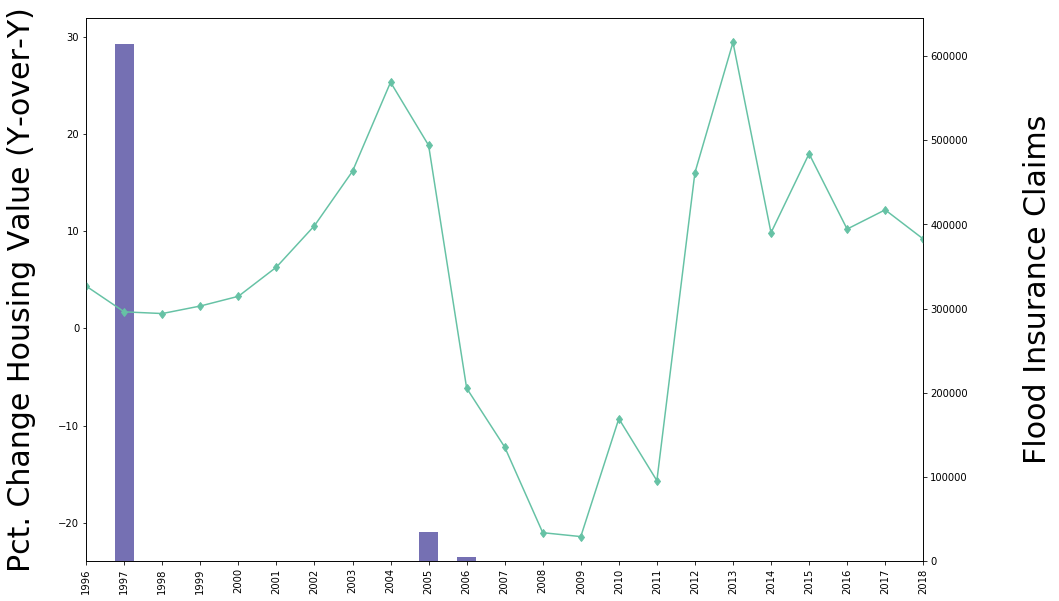

In [119]:

df = pd.DataFrame({'claims': claims_plot,
                   'housing_value': zillow_plot,
                  'year': np.arange(1996,2019)})
df.set_index('year')
fig, ax1 = plt.subplots(figsize=(15, 10))
ax2 = ax1.twinx()
df['claims'].plot(kind='bar', color='#7570b3', ax=ax1)
df['housing_value'].plot(kind='line', marker='d', color='#66c2a5', ax=ax2)
plt.xticks(range(0,df.shape[0]),labels=cols_use,fontsize=40)
ax1.yaxis.tick_right()
ax2.yaxis.tick_left()
ax1.set_ylabel('Pct. Change Housing Value (Y-over-Y)',labelpad=50,fontsize=30)
ax2.set_ylabel('Flood Insurance Claims',labelpad=100,fontsize=30)

In [144]:
time_series_keep = []

time_series_main = []

for i in range(1997,2018,1):
        
    has_claim = claims.loc[claims['zips']==89503,str(i)].values != 0
        
    if has_claim:
        cols = [str(i-1),str(i),str(i+1),str(i+2)]
        zt = zillow.loc[zillow['GEOID10']==int(89503),cols].values
        
        time_series_main.append(zt)


for j in zip_features_sort.index[1:10]:
    for i in range(1997,2018,1):
        
        has_claim = claims.loc[claims['zips']==float(j),str(i)].values != 0
        
        if has_claim:
            cols = [str(i-1),str(i),str(i+1),str(i+2)]
            zt = zillow.loc[zillow['GEOID10']==int(j),cols].values
            
            time_series_keep.append(zt)

In [151]:
time_series_df = np.zeros(shape=[len(time_series_keep),4])

In [152]:
for i in range(len(time_series_keep)):
    time_series_df[i,] = np.ndarray.flatten(time_series_keep[i])

In [154]:
time_series_df_main = np.zeros(shape=[len(time_series_main),4])

for i in range(len(time_series_main)):
    time_series_df_main[i,] = np.ndarray.flatten(time_series_main[i])

In [162]:
ymean = np.nanmean(time_series_df,axis=0)

y75 = numpy.nanquantile(time_series_df,0.75,axis=0)
y25 = numpy.nanquantile(time_series_df,0.25,axis=0)

y95 = numpy.nanquantile(time_series_df,0.95,axis=0)
y5 = numpy.nanquantile(time_series_df,0.05,axis=0)

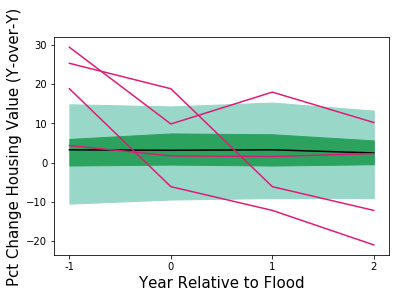

In [174]:
from matplotlib import pyplot as plt
import numpy as np

x = np.arange(0,4)

plt.plot(x, ymean, 'k-')
plt.fill_between(x, y5, y95,color='#99d8c9')
plt.fill_between(x, y25, y75,color='#2ca25f')
plt.plot(x,time_series_df_main[0,],color='#dd1c77')
plt.plot(x,time_series_df_main[1,],color='#dd1c77')
plt.plot(x,time_series_df_main[2,],color='#dd1c77')
plt.plot(x,time_series_df_main[3,],color='#dd1c77')
plt.xticks(x,labels=['-1','0','1','2'])
plt.xlabel('Year Relative to Flood',fontsize=15)
plt.ylabel('Pct Change Housing Value (Y-over-Y)',fontsize=15)
plt.figsize=(50, 40)
plt.show()



In [137]:
type(zillow['GEOID10'].values[0])

numpy.int64

In [149]:
np.ndarray.flatten(time_series_keep)

TypeError: descriptor 'flatten' requires a 'numpy.ndarray' object but received a 'list'

In [132]:
time_series_keep

[Empty DataFrame
 Columns: [1996, 1997, 1998, 1999]
 Index: [], Empty DataFrame
 Columns: [2004, 2005, 2006, 2007]
 Index: [], Empty DataFrame
 Columns: [2005, 2006, 2007, 2008]
 Index: [], Empty DataFrame
 Columns: [2013, 2014, 2015, 2016]
 Index: [], Empty DataFrame
 Columns: [1997, 1998, 1999, 2000]
 Index: [], Empty DataFrame
 Columns: [2003, 2004, 2005, 2006]
 Index: [], Empty DataFrame
 Columns: [2007, 2008, 2009, 2010]
 Index: [], Empty DataFrame
 Columns: [2008, 2009, 2010, 2011]
 Index: [], Empty DataFrame
 Columns: [2009, 2010, 2011, 2012]
 Index: [], Empty DataFrame
 Columns: [1999, 2000, 2001, 2002]
 Index: [], Empty DataFrame
 Columns: [2002, 2003, 2004, 2005]
 Index: [], Empty DataFrame
 Columns: [2008, 2009, 2010, 2011]
 Index: [], Empty DataFrame
 Columns: [2013, 2014, 2015, 2016]
 Index: [], Empty DataFrame
 Columns: [2002, 2003, 2004, 2005]
 Index: [], Empty DataFrame
 Columns: [2013, 2014, 2015, 2016]
 Index: [], Empty DataFrame
 Columns: [1997, 1998, 1999, 2000]
 In

In [126]:
claims.loc[claims['zips']==float(50316),'1998']

14452    3305.45
Name: 1998, dtype: float64

In [ ]:
# searching for zip codes in the claims dataset
